In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)

In [3]:
mask=mnist.target.astype(int)<=1
X,y=mnist.data[mask],mnist.target[mask].astype(int)

In [4]:
X=X/255.0

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [6]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [7]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [8]:
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)

In [9]:
print(train_accuracy)
print(test_accuracy)

1.0
0.9993234100135318


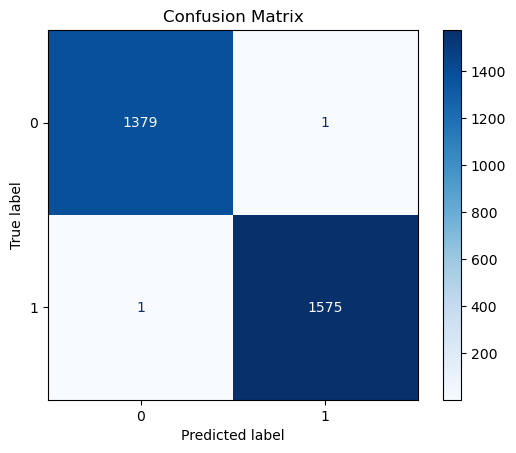

In [10]:
conf_matrix=confusion_matrix(y_test,y_test_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

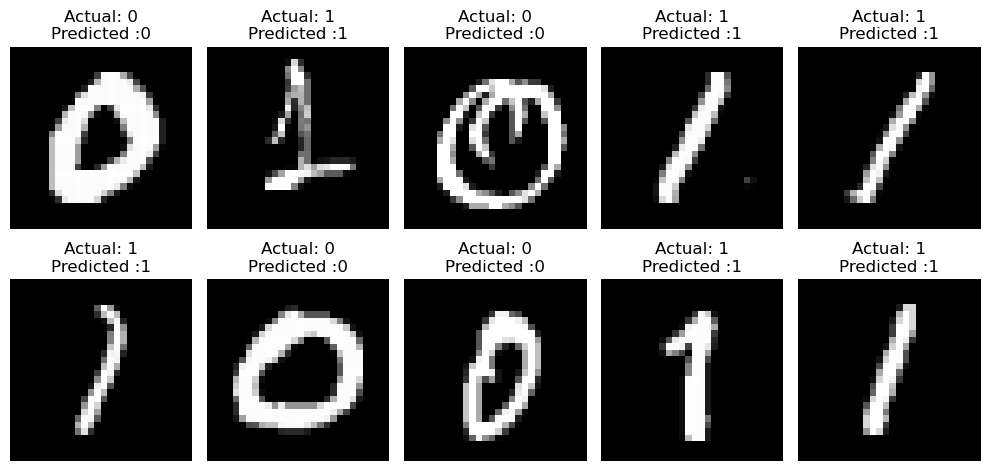

In [11]:
fig, axes=plt.subplots(2,5,figsize=(10,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_test.iloc[i].values.reshape(28,28),cmap='gray')
    ax.set_title(f'Actual: {y_test.iloc[i]}\nPredicted :{y_test_pred[i]}')
    ax.axis('Off')
plt.tight_layout()
plt.show()